# Statistics Project (M.Sc. Statistics for ML)

Submitters:

- Daniel Attali (3287808789)
- Sapir Bashan (214103368)

GitHub Repo Link:

- [https://github.com/dattali18/statistics_msc_course](https://github.com/dattali18/statistics_msc_course)

# Project Task 1: Building a Database

**Objective:**
To select a specific "population" of objects and build a statistical database for analysis.

**Requirements:**

1. **Population Selection:** - A distinct group of items (e.g., snacks, fruits, human performance data).
    * **Sample Size:** At least 36 objects. The total count must be a multiple of 4 (e.g., 100, 104).
    * **Sources:** Can be gathered manually or from existing databases (requires approval).

2. **Variables:** - The population must be measured by various parameters:
    * **Continuous:** Weight, height, length, etc.
    * **Categorical:** Color, type, etc.
    * **Nominal/Ordinal:** A ranking scale (e.g., Perfect, Good, Bad).

3. **Data Entry:** - All observations must be organized in a single Excel file.

The data we chose is the "bodyPerformance.csv" dataset from [Kaggle](https://www.kaggle.com/datasets/kukuroo3/body-performance-data?resource=download), the data has 13393 observations of individuals with various physical performance metrics. and 12 variables. from this we chose a subset of 100 observations for our analysis.
And we also chose the variables of 'age', 'gender', 'height', 'weight', 'body fat'. We also changed the 'gender' column values from 'M' and 'F' to '1' and '0' respectively to make it easier for analysis.

### Phase 3: Primary Statistical Analysis

**Goal:** Perform initial statistical calculations on **one central continuous variable** (calculating for more than one yields a bonus).

**Required Calculations:**

* **Measures of Central Tendency:**
    * **Mean:** The average value.
    * **Median:** The middle value when sorted.
    * **Mode:** The most frequent value.
    * **Mid-range:** (Max + Min) / 2.
* **Measures of Dispersion:**
    * **Range:** Max value - Min value.
    * **Variance:** The average squared deviation from the mean.
    * **Standard Deviation (SD):** The square root of the variance.
    * **Mean Absolute Deviation (MAD):** The average of the absolute differences from the mean.
* **Other:**
    * **Error Percentage/Proportions:** As relevant to the data.

In [3]:
# load the data
import pandas as pd

data_path = "../database/human.csv"
df = pd.read_csv(data_path)

In [4]:
# show the shape of the data
df.shape

(100, 5)

In [5]:
df.head()

,age,gender,height,weight,bf
0,21.0,0,167.4,72.18,40.0
1,42.0,1,162.3,67.30,18.0
2,36.0,1,178.5,90.50,14.7
3,23.0,1,180.9,77.10,25.4
4,53.0,1,177.3,88.48,35.6


### Mean (Average)

Formula for Mean:

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

In [6]:
# we will find the mean of each of the continuous variables
mean_values = df[['age', 'height', 'weight', 'bf']].mean()
# name the second column as 'Mean'
mean_values.name = 'Mean'
mean_values

age        36.93000
height    168.31600
weight     67.70460
bf         23.94307
Name: Mean, dtype: float64

### Median

Formula for Median:

- If n is odd: Median = value at position $(n + 1) / 2$
- If n is even: Median = average of values at positions $n / 2$ and $(n / 2) + 1$

In [7]:
median = df[['age', 'height', 'weight', 'bf']].median()
median.name = 'Median'
median

age        34.50
height    169.05
weight     67.45
bf         24.70
Name: Median, dtype: float64

### Mode

The mode is the value that appears most frequently in a data set.

In [8]:
mode = df[['age', 'height', 'weight', 'bf']].mode().iloc[0]
mode.name = 'Mode'
mode

age        21.0
height    167.2
weight     67.3
bf         25.1
Name: Mode, dtype: float64

### Mid-range

The mid-range is calculated as:

$$Mid\text{-}range = \frac{Max + Min}{2}$$


In [9]:
maxes = df[['age', 'height', 'weight', 'bf']].max()
mins = df[['age', 'height', 'weight', 'bf']].min()
mid_range = (maxes + mins) / 2
mid_range.name = 'Mid-range'
mid_range

age        42.50
height    167.15
weight     70.85
bf         24.50
Name: Mid-range, dtype: float64

### Summery Table of Central Tendency

In [10]:
central_tendency = pd.concat([mean_values, median, mode, mid_range], axis=1)
central_tendency

,Mean,Median,Mode,Mid-range
age,36.93000,34.50,21.0,42.50
height,168.31600,169.05,167.2,167.15
weight,67.70460,67.45,67.3,70.85
bf,23.94307,24.70,25.1,24.50


## Range

The range is calculated as:

$$Range = Max - Min$$

In [11]:
ranges = maxes - mins
ranges.name = 'Range'
ranges

age       43.0
height    32.1
weight    55.3
bf        34.6
Name: Range, dtype: float64

### Variance

The formula for Variance is:

$$Variance = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

In [12]:
variance = df[['age', 'height', 'weight', 'bf']].var()
variance.name = 'Variance'
variance

age       157.257677
height     63.911661
weight    143.930318
bf         53.909503
Name: Variance, dtype: float64

### Standard Deviation

The formula for Standard Deviation is:

$$SD = \sqrt{Variance}$$

In [13]:
stds = df[['age', 'height', 'weight', 'bf']].std()
stds.name = 'Standard Deviation'
stds

age       12.540242
height     7.994477
weight    11.997096
bf         7.342309
Name: Standard Deviation, dtype: float64

### Mean Absolute Deviation (MAD)

The formula for MAD is:

$$MAD = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}|$$

In [14]:
# MAD is not directly available in pandas, we can calculate it manually
# we will do the MAD for 'age'
mad = (df[['age', 'height', 'weight', 'bf']] - mean_values[['age', 'height', 'weight', 'bf']]).abs().mean()
mad.name = 'Mean Absolute Deviation'
mad

age       10.600200
height     6.634720
weight     9.743892
bf         5.925762
Name: Mean Absolute Deviation, dtype: float64

### Summery Table of Dispersion

In [15]:
dispersion_df = pd.concat([ranges, variance, stds, mad], axis=1)
dispersion_df

,Range,Variance,Standard Deviation,Mean Absolute Deviation
age,43.0,157.257677,12.540242,10.600200
height,32.1,63.911661,7.994477,6.634720
weight,55.3,143.930318,11.997096,9.743892
bf,34.6,53.909503,7.342309,5.925762


### Summery Table of Central Tendency and Dispersion

In [16]:
summary_df = pd.concat([central_tendency, dispersion_df], axis=1)
summary_df

,Mean,Median,Mode,Mid-range,Range,Variance,Standard Deviation,Mean Absolute Deviation
age,36.93000,34.50,21.0,42.50,43.0,157.257677,12.540242,10.600200
height,168.31600,169.05,167.2,167.15,32.1,63.911661,7.994477,6.634720
weight,67.70460,67.45,67.3,70.85,55.3,143.930318,11.997096,9.743892
bf,23.94307,24.70,25.1,24.50,34.6,53.909503,7.342309,5.925762


### Phase 4: Frequency Distribution & Grouped Analysis

**Goal:** Organize the raw data into classes (groups) to analyze the frequency distribution.

**Steps:**

1. **Create a Frequency Table:**
    * Define **Class Width** and create classes (bins).
    * List **Apparent Limits** and **Real Limits (Boundaries)**.
    * Calculate **Frequencies** for each class.
    * Calculate **Cumulative Frequency**.
    * Calculate **Relative Frequency** (proportion of total) and **Cumulative Relative Frequency**.

2. **Calculate Parameters for Grouped Data:**
    * **Grouped Median:** Estimated using interpolation within the median class.
    * **Interquartile Range (IQR):** The difference between the 3rd Quartile ($Q_3$/$P_{75}$) and 1st Quartile ($Q_1$/$P_{25}$).
    * **Percentiles:** Specifically calculate the **10th Percentile ($P_{10}$)** and the **90th Percentile ($P_{90}$)**.

We will do the frequency distribution for the 'age' variable.

In [17]:
binned_age = pd.cut(df['age'], bins=10)
frequency_table = binned_age.value_counts().sort_index()
# add a cumulative frequency column
cumulative_frequency = frequency_table.cumsum()
# add a relative frequency column
relative_frequency = frequency_table / frequency_table.sum()
# add a cumulative relative frequency column
cumulative_relative_frequency = relative_frequency.cumsum()
frequency_table = pd.DataFrame({
    'Frequency': frequency_table,
    'Cumulative Frequency': cumulative_frequency,
    'Relative Frequency': relative_frequency,
    'Cumulative Relative Frequency': cumulative_relative_frequency
})
frequency_table

,Frequency,Cumulative Frequency,Relative Frequency,Cumulative Relative Frequency
age,,,,
"(20.957, 25.3]",21,21,0.21,0.21
"(25.3, 29.6]",16,37,0.16,0.37
"(29.6, 33.9]",12,49,0.12,0.49
"(33.9, 38.2]",12,61,0.12,0.61
"(38.2, 42.5]",6,67,0.06,0.67
"(42.5, 46.8]",8,75,0.08,0.75
"(46.8, 51.1]",11,86,0.11,0.86
"(51.1, 55.4]",2,88,0.02,0.88
"(55.4, 59.7]",4,92,0.04,0.92


### Parameters for Grouped Data

#### Median

Median for grouped data is calculated using the formula:

$$Median = L + \left(\frac{\frac{n}{2} - CF}{f}\right) \times h$$

Where:
- $L$ = Lower boundary of the median class
- $n$ = Total number of observations
- $CF$ = Cumulative frequency of the class before the median class
- $f$ = Frequency of the median class
- $h$ = Class width

In [18]:
# median
n = frequency_table['Frequency'].sum()
median_class = frequency_table[frequency_table['Cumulative Frequency'] >= n/2].index[0]
L = median_class.left
f = frequency_table.loc[median_class, 'Frequency']
CF = frequency_table[frequency_table.index < median_class]['Frequency'].sum()
h = median_class.right - median_class.left
grouped_median = L + ((n/2 - CF) / f) * h
print(f"Grouped median: {grouped_median:.2f}")

Grouped median: 34.26


#### Interquartile Range (IQR)

For grouped data, Q1 and Q3 are calculated using the formulas:

$$Q1 = L1 + \left(\frac{(n/4) - CF1}{f1}\right) \times h$$
$$Q3 = L3 + \left(\frac{(3n/4) - CF3}{f3}\right) \times h$$

Where:
- $L1$, $L3$ = Lower boundaries of the Q1 and Q3 classes
- $CF1$, $CF3$ = Cumulative frequencies before the Q1 and Q3 classes
- $f1$, $f3$ = Frequencies of the Q1 and Q3 classes
- $h$ = Class width
- $n$ = Total number of observations

In [19]:
q25 = n * 0.25
q75 = n * 0.75
# find Q1 class
q1_class = frequency_table[frequency_table['Cumulative Frequency'] >= q25].index
q1_class = q1_class[0]
L1 = q1_class.left
f1 = frequency_table.loc[q1_class, 'Frequency']
CF1 = frequency_table[frequency_table.index < q1_class]['Frequency'].sum()
h1 = q1_class.right - q1_class.left
Q1 = L1 + ((q25 - CF1) / f1) * h
# find Q3 class
q3_class = frequency_table[frequency_table['Cumulative Frequency'] >= q75].index
q3_class = q3_class[0]
L3 = q3_class.left
f3 = frequency_table.loc[q3_class, 'Frequency']
CF3 = frequency_table[frequency_table.index < q3_class]['Frequency'].sum()
h3 = q3_class.right - q3_class.left
Q3 = L3 + ((q75 - CF3) / f3) * h
IQR = Q3 - Q1
print(f"IQR: {IQR:.2f}")

IQR: 20.43


#### Percentiles (P10 and P90)

Formula for Percentiles:

$$P_k = L + \left(\frac{(k \cdot n / 100) - CF}{f}\right) \times h$$

Where:
- $P_k$ = k-th percentile
- $L$ = Lower boundary of the percentile class
- $n$ = Total number of observations
- $CF$ = Cumulative frequency before the percentile class
- $f$ = Frequency of the percentile class

In [20]:
p10 = n * 0.10
p90 = n * 0.90
# find P10 class
p10_class = frequency_table[frequency_table['Cumulative Frequency'] >= p10].index
p10_class = p10_class[0]
L10 = p10_class.left
f10 = frequency_table.loc[p10_class, 'Frequency']
CF10 = frequency_table[frequency_table.index < p10_class]['Frequency'].sum()
h10 = p10_class.right - p10_class.left
P10 = L10 + ((p10 - CF10) / f10) * h
# find P90 class
p90_class = frequency_table[frequency_table['Cumulative Frequency'] >= p90].index
p90_class = p90_class[0]
L90 = p90_class.left
f90 = frequency_table.loc[p90_class, 'Frequency']
CF90 = frequency_table[frequency_table.index < p90_class]['Frequency'].sum()
h90 = p90_class.right - p90_class.left
P90 = L90 + ((p90 - CF90) / f90) * h
print(f"P10: {P10:.2f}, P90: {P90:.2f}")

P10: 23.00, P90: 57.55


### Summery Table of Grouped Data Parameters

In [21]:
grouped_param_df = pd.DataFrame({
    'Grouped Median': [grouped_median],
    'IQR': [IQR],
    'P10': [P10],
    'P90': [P90]
})
grouped_param_df

,Grouped Median,IQR,P10,P90
0,34.258333,20.425,23.004619,57.55


## Phase 5: Visualization

**Goal:** Present the data visually using specific chart types.

**Required Charts:**
1.  **Bar / Column Chart:** Best for categorical data or simple comparisons.
2.  **Histogram:** To show the distribution of the continuous variable (based on the frequency table from Phase 4).
3.  **Pie Chart:** To show the relative proportions of categorical parts (e.g., the "Nominal Classification" groups).
4.  **Frequency Polygon:** A line graph plotted using the midpoints of the histogram bars.
5.  **Ogive (Cumulative Frequency Graph):** A line graph showing the cumulative frequency accumulation.

In [22]:
import matplotlib.pyplot as plt

In [23]:
# set the style to be 'ggplot'
plt.style.use('ggplot')

### Bar Plot for `gender`

In [24]:
# plot a bar chart for 'gender'
map_gender_to_str = {0 : 'Female', 1 : 'Male'}
df['gender_str'] = df['gender'].map(map_gender_to_str)

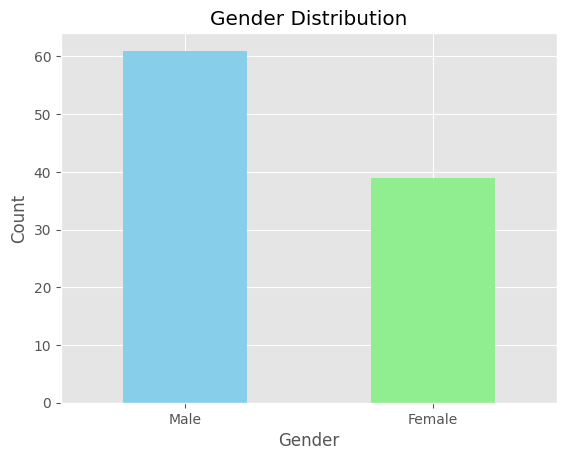

In [25]:
# plot the bar chart of grouped age, height, weight per gender
gender_counts = df['gender_str'].value_counts()
gender_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Histogram

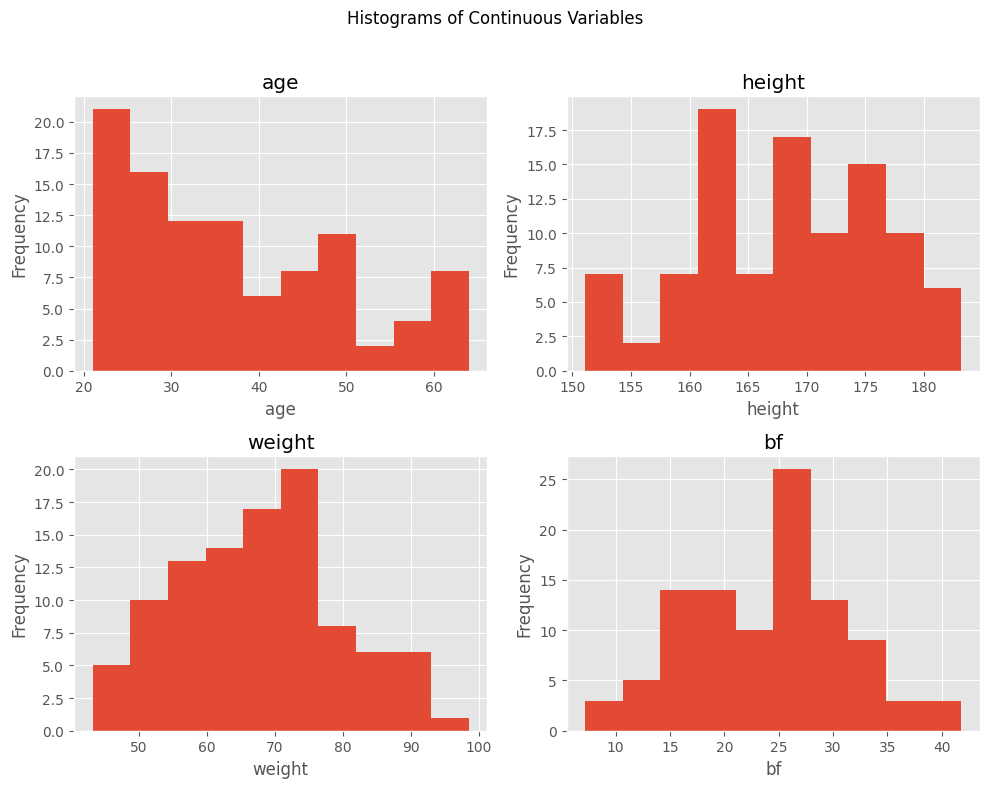

In [26]:
# plot a histogram for 'age', 'height', 'weight', 'bf', 'gender'
cols = ['age', 'height', 'weight', 'bf']
axes = df[cols].hist(bins=10, figsize=(10, 8))

# ensure we have a flat iterable of axes
if hasattr(axes, "ravel"):
    axes_iter = axes.ravel()
else:
    axes_iter = [axes]

for ax, col in zip(axes_iter, cols):
    ax.set_title(col)          # set the variable name as the subplot title
    ax.set_xlabel(col)         # optional: label x-axis with variable name
    ax.set_ylabel('Frequency') # optional: label y-axis

plt.suptitle('Histograms of Continuous Variables')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the suptitle
plt.show()

### Pie chart

We will create a pie chart for height groups.

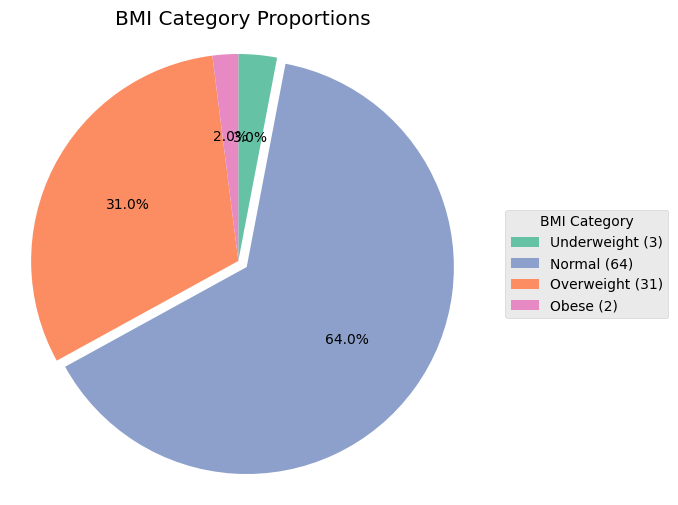

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# ensure height in meters
h = df['height'].copy()
if h.median() > 3:
    h = h / 100.0

# compute BMI and categories
df['BMI'] = df['weight'] / (h ** 2)
def bmi_category(b):
    if b < 18.5:
        return 'Underweight'
    if b < 25:
        return 'Normal'
    if b < 30:
        return 'Overweight'
    return 'Obese'
df['BMI_cat'] = df['BMI'].apply(bmi_category)

# fixed order for categories and counts
order = ['Underweight', 'Normal', 'Overweight', 'Obese']
counts = df['BMI_cat'].value_counts().reindex(order).fillna(0)

colors = ['#66c2a5', '#8da0cb', '#fc8d62', '#e78ac3']
explode = [0.05 if (v == counts.max() and v > 0) else 0 for v in counts]

# plot pie (labels omitted so legend shows mapping)
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    counts.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    counterclock=False
)
ax.set_title('BMI Category Proportions')
ax.axis('equal')

# legend with colored patches showing class and count
patches = [
    mpatches.Patch(facecolor=c, label=f"{cat} ({int(counts[cat])})")
    for c, cat in zip(colors, order)
]
ax.legend(handles=patches, title='BMI Category', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()


### Frequency Polygon + Ogive

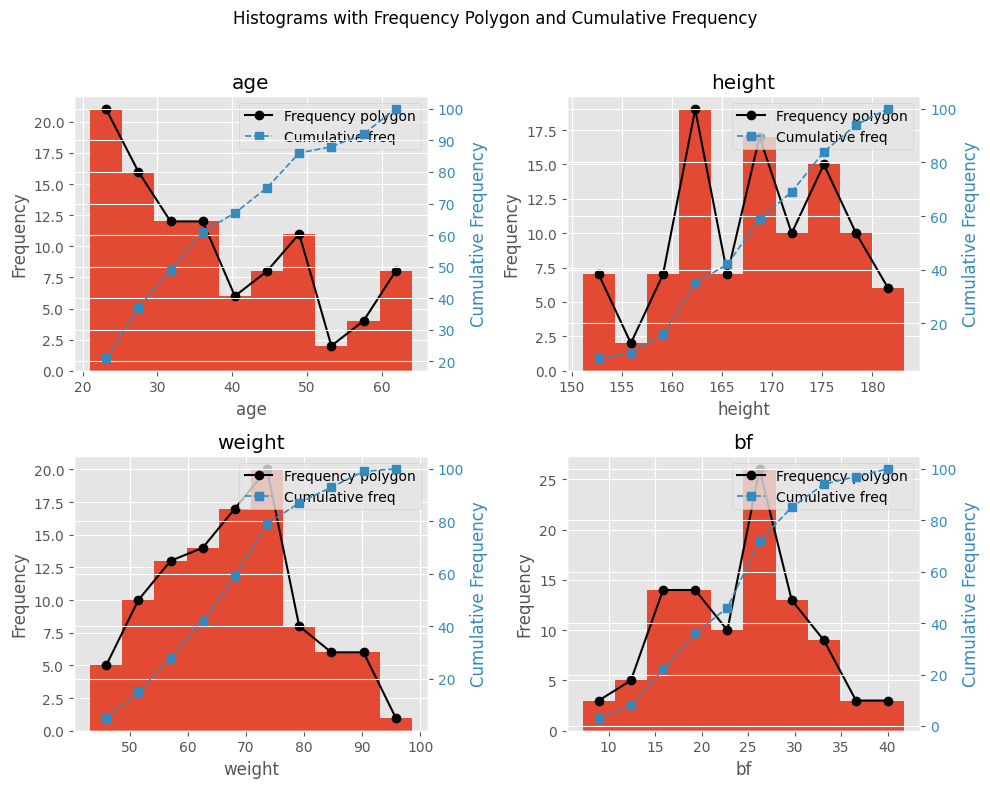

In [28]:
import numpy as np
import matplotlib.pyplot as plt

cols = ['age', 'height', 'weight', 'bf']
axes = df[cols].hist(bins=10, figsize=(10, 8))

# ensure we have a flat iterable of axes
if hasattr(axes, "ravel"):
    axes_iter = axes.ravel()
else:
    axes_iter = [axes]

for ax, col in zip(axes_iter, cols):
    # compute histogram counts and bin edges (same bins used for the bars)
    series = df[col].dropna()
    counts, edges = np.histogram(series, bins=10)
    midpoints = (edges[:-1] + edges[1:]) / 2

    # frequency polygon: line through midpoints
    line1, = ax.plot(midpoints, counts, color='black', marker='o', linestyle='-', linewidth=1.5, label='Frequency polygon')

    # cumulative frequency on secondary y-axis
    ax2 = ax.twinx()
    cum = counts.cumsum()
    line2, = ax2.plot(midpoints, cum, color='C1', marker='s', linestyle='--', linewidth=1.2, label='Cumulative freq')
    ax2.set_ylabel('Cumulative Frequency', color='C1')
    ax2.tick_params(axis='y', labelcolor='C1')

    # labels and title
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    # combined legend
    ax.legend(handles=[line1, line2], loc='upper right')

plt.suptitle('Histograms with Frequency Polygon and Cumulative Frequency')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Project Task 2: Confidence Intervals (Interval Estimation)

**Objective:**
To build Confidence Intervals (CI) for the central variable chosen in Task 1, under different conditions (known vs. unknown variance, large vs. small samples) and for a proportion.

**General Requirements:**

* **Target Variable:** Use the central variable from Task 1 (doing more than one is a bonus).
* **Confidence Levels:** For every part, you must calculate the interval for **90%, 95%, and 99%** confidence levels.
* **Interval Length:** In all cases, you must explicitly state the **length/size** of the confidence interval (Upper Bound - Lower Bound).
* **Submission:** Add to the existing Excel file and explain in the Word document.

## Part 1: CI for Mean (Known Sigma)

**Scenario:**
Construct a Confidence Interval for the population mean ($\mu$) assuming the population Standard Deviation ($\sigma$) is **known**.

**Methodology:**

* **Population SD ($\sigma$):** Use the standard deviation calculated for the *entire* database in Task 1.
* **Sampling:** Randomly select **at least 32 observations** (but no more than 25% of the total population).
* **Distribution:** Use the **Normal Distribution (Z-table)** since $\sigma$ is known.
* **Output:** Calculate intervals for 90%, 95%, 99% and state their lengths.

The formula for the confidence interval when sigma is known is:

$$CI = \bar{x} \pm Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$

Where:
- $\bar{x}$ = sample mean
- $Z_{\alpha/2}$ = Z-score for the desired confidence level
- $\sigma$ = population standard deviation
- $n$ = sample size

In [29]:
# we will do the CI for 'age' variable
import numpy as np
import scipy.stats as stats

# population standard deviation
population_sigma = df['age'].std()
# sample size
n = 32
# randomly select n observations
sample = df['age'].sample(n=n, random_state=1)
# sample

In [30]:
sample_mean = sample.mean()

# confidence levels and corresponding Z-scores
confidence_levels = [0.90, 0.95, 0.99]
z_scores = [stats.norm.ppf(1 - (1 - cl) / 2 ) for cl in confidence_levels]
# calculate CI for each confidence level
ci_results = {}
for cl, z in zip(confidence_levels, z_scores):
    margin_of_error = z * (population_sigma / np.sqrt(n))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    ci_length = upper_bound - lower_bound
    ci_results[cl] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Length': ci_length
    }

ci_df = pd.DataFrame(ci_results).T
ci_df.index.name = 'Confidence Level'
ci_df

,Lower Bound,Upper Bound,Length
Confidence Level,,,
0.90,31.697401,38.990099,7.292697
0.95,30.998858,39.688642,8.689785
0.99,29.633593,41.053907,11.420313


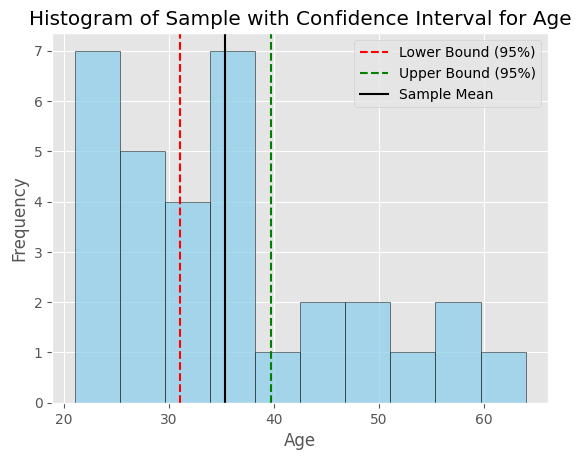

In [31]:
# visualize the CI for 'Height' on the histogram of the sample
import matplotlib.pyplot as plt

cl = 0.95
z = stats.norm.ppf(1 - (1 - cl) / 2 )
margin_of_error = z * (population_sigma / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
# plot histogram
plt.hist(sample, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
# plot CI
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({cl*100:.0f}%)')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({cl*100:.0f}%)')
plt.axvline(sample_mean, color='black', linestyle='-', label='Sample Mean')
plt.title('Histogram of Sample with Confidence Interval for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [32]:
# do the same for 'height' variable
# population standard deviation
population_sigma = df['height'].std()
# sample size
n = 32
# randomly select n observations
sample = df['height'].sample(n=n, random_state=1)
# sample

In [33]:
sample_mean = sample.mean()

# confidence levels and corresponding Z-scores
confidence_levels = [0.90, 0.95, 0.99]
z_scores = [stats.norm.ppf(1 - (1 - cl) / 2 ) for cl in confidence_levels]
# calculate CI for each confidence level
ci_results = {}
for cl, z in zip(confidence_levels, z_scores):
    margin_of_error = z * (population_sigma / np.sqrt(n))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    ci_length = upper_bound - lower_bound
    ci_results[cl] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Length': ci_length
    }

ci_df = pd.DataFrame(ci_results).T
ci_df.index.name = 'Confidence Level'
ci_df

,Lower Bound,Upper Bound,Length
Confidence Level,,,
0.90,166.966057,171.615193,4.649137
0.95,166.520731,172.060519,5.539788
0.99,165.650367,172.930883,7.280516


We will try to visualize the confidence intervals for 'age' variable

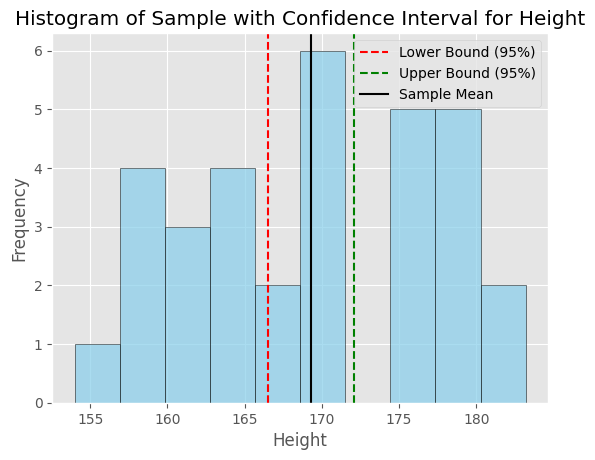

In [34]:
# visualize the CI for 'Height' on the histogram of the sample
import matplotlib.pyplot as plt

cl = 0.95
z = stats.norm.ppf(1 - (1 - cl) / 2 )
margin_of_error = z * (population_sigma / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
# plot histogram
plt.hist(sample, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
# plot CI
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({cl*100:.0f}%)')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({cl*100:.0f}%)')
plt.axvline(sample_mean, color='black', linestyle='-', label='Sample Mean')
plt.title('Histogram of Sample with Confidence Interval for Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Part 2: CI for Mean (Unknown Sigma - Large Sample)

**Scenario:**
Construct a Confidence Interval for the population mean ($\mu$) when the population Standard Deviation is **unknown**.

**Methodology:**

* **Sample SD ($S$):** Calculate the **unbiased sample standard deviation** ($S$) from the sample data itself.
* **Sampling:**
    * Randomly select **at least 32 observations** (max 25% of population).
    * **Note:** These observations should be mostly **different** from those selected in Part 1.
* **Output:** Calculate intervals for 90%, 95%, 99% and state their lengths.

The formula for the confidence interval when $\sigma$ is unknown is:

$$CI = \bar{x} \pm Z_{\alpha/2} \times \frac{S}{\sqrt{n}}$$

Where:
- $\bar{x}$ = sample mean
- $Z_{\alpha/2}$ = Z-score for the desired confidence level
- $S$ = sample standard deviation
- $n$ = sample size


In [35]:
# we will do the CI for 'age' variable
import numpy as np
import scipy.stats as stats

# sample size
n = 32
# randomly select n observations (different from previous sample)
sample = df['age'].sample(n=n, random_state=2)
# sample

In [36]:
sample_mean = sample.mean()
sample_std = sample.std()
# confidence levels and corresponding Z-scores
confidence_levels = [0.90, 0.95, 0.99]
z_scores = [stats.norm.ppf(1 - (1 - cl) / 2) for cl in confidence_levels]
# calculate CI for each confidence level
ci_results = {}
for cl, z in zip(confidence_levels, z_scores):
    margin_of_error = z * (sample_std / np.sqrt(n))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    ci_length = upper_bound - lower_bound
    ci_results[cl] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Length': ci_length
    }

ci_df = pd.DataFrame(ci_results).T
ci_df.index.name = 'Confidence Level'
ci_df

,Lower Bound,Upper Bound,Length
Confidence Level,,,
0.90,30.502394,35.997606,5.495212
0.95,29.976025,36.523975,6.547949
0.99,28.947268,37.552732,8.605464


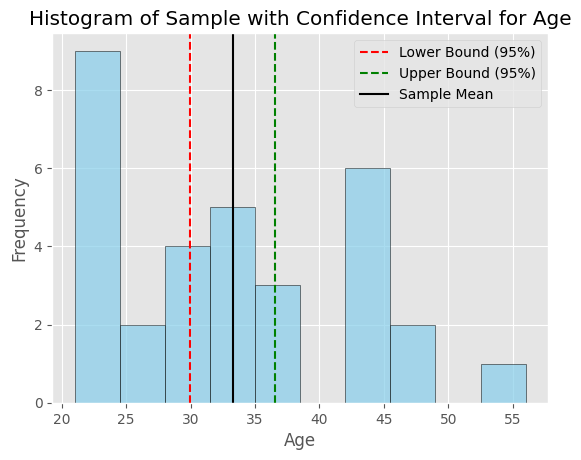

In [37]:
# visualize the CI for 'age' on the histogram of the sample
import matplotlib.pyplot as plt

cl = 0.95
z = stats.norm.ppf(1 - (1 - cl) / 2)
margin_of_error = z * (sample_std / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
# plot histogram
plt.hist(sample, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
# plot CI
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({cl*100:.0f}%)')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({cl*100:.0f}%)')
plt.axvline(sample_mean, color='black', linestyle='-', label='Sample Mean')
plt.title('Histogram of Sample with Confidence Interval for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Part 3: CI for Mean (Unknown Sigma - Small Sample)

**Scenario:**
Construct a Confidence Interval for the mean assuming a **Normal Distribution** but with a **small sample size**.

**Methodology:**

* **Sampling:**
    * Randomly select **at most 16 observations**.
    * **Note:** These observations should be mostly **different** from previous sections.
* **Distribution:** Use the **Student's t-distribution** ($t$-table) because $n < 30$ and $\sigma$ is unknown.
* **Output:** Calculate intervals for 90%, 95%, 99% and state their lengths.

The formula for the confidence interval using the t-distribution is:

$$CI = \bar{x} \pm t_{\alpha/2, df} \times \frac{S}{\sqrt{n}}$$

Where:
- $\bar{x}$ = sample mean
- $t_{\alpha/2, df}$ = t-score for the desired confidence level and degrees of freedom
- $S$ = sample standard deviation
- $n$ = sample size
- $df$ = degrees of freedom ($n - 1$)

In [38]:
# we will do the CI for 'age' variable
import numpy as np
import scipy.stats as stats

# sample size
n = 16
# randomly select n observations (different from previous samples)
sample = df['age'].sample(n=n, random_state=3)
# sample

In [39]:
sample_mean = sample.mean()
sample_std = sample.std()
dfree = n - 1
# confidence levels and corresponding t-scores
confidence_levels = [0.90, 0.95, 0.99]
t_scores = [stats.t.ppf(1 - (1 - cl) / 2, df=dfree) for cl in confidence_levels]
# calculate CI for each confidence level
ci_results = {}
for cl, t in zip(confidence_levels, t_scores):
    margin_of_error = t * (sample_std / np.sqrt(n))
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    ci_length = upper_bound - lower_bound
    ci_results[cl] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Length': ci_length
    }

ci_df = pd.DataFrame(ci_results).T
ci_df.index.name = 'Confidence Level'
ci_df

,Lower Bound,Upper Bound,Length
Confidence Level,,,
0.90,30.031079,42.093921,12.062841
0.95,28.729186,43.395814,14.666628
0.99,25.924249,46.200751,20.276502


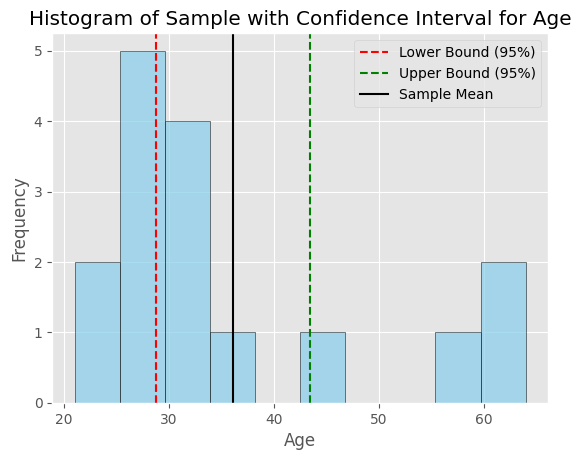

In [40]:
# visualize the CI for 'age' on the histogram of the sample
import matplotlib.pyplot as plt

cl = 0.95
t = stats.t.ppf(1 - (1 - cl) / 2, df=dfree)
margin_of_error = t * (sample_std / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error
# plot histogram
plt.hist(sample, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
# plot CI
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({cl*100:.0f}%)')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({cl*100:.0f}%)')
plt.axvline(sample_mean, color='black', linestyle='-', label='Sample Mean')
plt.title('Histogram of Sample with Confidence Interval for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Part 4: CI for Proportion

**Scenario:**
Construct a Confidence Interval for a specific **Proportion (Ratio)** within your population.

**Methodology:**
* **Define Success:** Define a binary criteria for your variable (e.g., "% of athletes with Height > 180cm", "% of products classified as 'Grade A'").
* **Calculation:** Calculate the sample proportion ($\hat{p}$) and build the interval.
* **Output:** Calculate intervals for 90%, 95%, 99% and state their lengths.

The formula for the confidence interval for a proportion is:

$$CI = \hat{p} \pm Z_{\alpha/2} \times \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$$

Where:
- $\hat{p}$ = sample proportion
- $Z_{\alpha/2}$ = Z-score for the desired confidence level
- $n$ = sample size

In [41]:
# we will do the CI for proportion of gender
import numpy as np
import scipy.stats as stats

# sample size
n = df.shape[0]
# randomly select n observations
sample = df['gender'].sample(n=n, random_state=4)

In [42]:
# calculate sample proportion of males
p_hat = (sample == 1).mean()
# confidence levels and corresponding Z-scores
confidence_levels = [0.90, 0.95, 0.99]
z_scores = [stats.norm.ppf(1 - (1 - cl) / 2) for cl in confidence_levels]
# calculate CI for each confidence level
ci_results = {}
for cl, z in zip(confidence_levels, z_scores):
    margin_of_error = z * np.sqrt((p_hat * (1 - p_hat)) / n)
    lower_bound = p_hat - margin_of_error
    upper_bound = p_hat + margin_of_error
    ci_length = upper_bound - lower_bound
    ci_results[cl] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Length': ci_length
    }

ci_df = pd.DataFrame(ci_results).T
ci_df.index.name = 'Confidence Level'
ci_df

,Lower Bound,Upper Bound,Length
Confidence Level,,,
0.90,0.529772,0.690228,0.160455
0.95,0.514403,0.705597,0.191194
0.99,0.484364,0.735636,0.251272


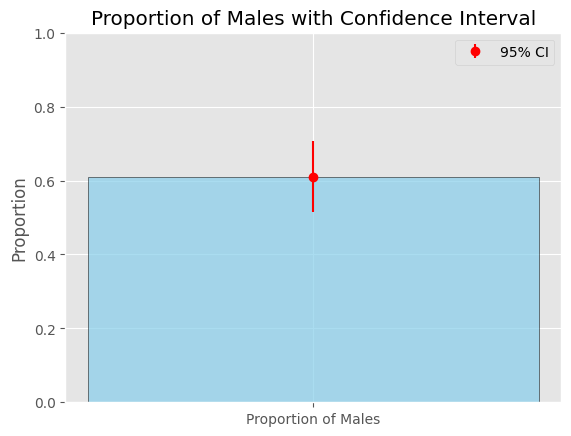

In [43]:
# visualize the CI for proportion of
import matplotlib.pyplot as plt

cl = 0.95
z = stats.norm.ppf(1 - (1 - cl) / 2)
margin_of_error = z * np.sqrt((p_hat * (1 - p_hat)) / n)
lower_bound = p_hat - margin_of_error
upper_bound = p_hat + margin_of_error
# plot proportion with CI
plt.bar(['Proportion of Males'], [p_hat], color='skyblue', edgecolor='black', alpha=0.7)
plt.errorbar(['Proportion of Males'], [p_hat], yerr=[[p_hat - lower_bound], [upper_bound - p_hat]], fmt='o', color='red', label=f'{cl*100:.0f}% CI')
plt.ylim(0, 1)
plt.title('Proportion of Males with Confidence Interval')
plt.ylabel('Proportion')
plt.legend()
plt.show()

# Project Task 3: Hypothesis Testing, ANOVA, and $\chi^2$ Tests

**Objective:**
To perform various hypothesis tests on your database, including tests for differences in means, variance analysis (ANOVA), and Chi-Square tests for fit and independence.

**General Requirements:**
* **Target Variable:** Continue using the central variable from previous tasks.
* **Confidence Levels:** For every test, you must determine the conclusion (Reject/Fail to Reject $H_0$) at **90%, 95%, and 99%** confidence levels.
* **Submission:** Add to the existing Excel file and explain in the Word document.

## Part 1: Difference in Means (Small Sample / T-Test)

**Scenario:**
Compare the means of **2 specific groups** (out of the 4+ groups in your data) using small samples.

**Methodology:**
* **Sampling:**
    * **Group A:** Randomly sample **6 to 9** observations.
    * **Group B:** Randomly sample **10 to 16** observations.
* **Hypothesis ($H_1$):** Formulate an alternative hypothesis (e.g., $\mu_A \neq \mu_B$ or $\mu_A > \mu_B$) based on the sample data.
* **Test:** Perform a Hypothesis Test for the difference of means (assumed Student's t-distribution due to small sample).
* **Output:** Determine if $H_0$ is rejected at 90%, 95%, and 99%.

The formula for the t-test for difference of means is:

$$t = \frac{\bar{X}_A - \bar{X}_B}{\sqrt{\frac{S_A^2}{n_A} + \frac{S_B^2}{n_B}}}$$

Where:
- $\bar{X}_A$, $\bar{X}_B$ = sample means of groups A and B
- $S_A^2$, $S_B^2$ = sample variances of groups A and B
- $n_A$, $n_B$ = sample sizes

We reject $H_0$ if the calculated p-value is less than the significance level ($\alpha$).

Let's formulate the t-test for difference of means for 'weight' and 'height' between 'male' and 'female

$$H_0: \mu_{male} - \mu_{female} = 0$$

The alternative hypothesis $H_1$ is that there is a difference in means:

$$H_1: \mu_{male} - \mu_{female} \neq 0$$

In [44]:
# get the two groups
n_sample_1 = 9
n_sample_2 = 16

group_A = df[df['gender']== 0]['weight'].sample(n=n_sample_1, random_state=5)
group_B = df[df['gender']== 1]['weight'].sample(n=n_sample_2, random_state=6)

grouped_AB = pd.DataFrame({
    'Group A (Female)': group_A.reset_index(drop=True),
    'Group B (Male)': group_B.reset_index(drop=True)
})
grouped_AB

,Group A (Female),Group B (Male)
0,56.00,92.50
1,62.68,63.80
2,56.70,67.30
3,50.90,62.80
4,53.90,64.40
5,53.20,62.14
6,67.30,78.72
7,69.10,67.30
8,60.40,85.40
9,NaN,74.20


In [45]:
# H1: mu_A != mu_B (two-tailed test)
import scipy.stats as stats

# perform t-test
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)  # Welch's t-test

# print the p_value
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# significance levels
alpha_levels = [0.10, 0.05, 0.01]
results = {}
for alpha in alpha_levels:
    reject_H0 = p_value < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])

results_df.index.name = 'Alpha Level'
results_df

T-statistic: -4.2016, P-value: 0.0004


,Conclusion
Alpha Level,
0.10,Reject H0
0.05,Reject H0
0.01,Reject H0


Conclusion: Based on the p-values obtained from the t-test for the 'weight' variable, we can say for all significance levels (10%, 5%, 1%), we fail to reject $H_0$ meaning there is  significant difference between the means of weight between the two groups, meaning the average weight for male and female are statistically different.

In [46]:
# do the same but for 'height' variable manually calculating t-statistic and critical values

n_sample_1 = 9
n_sample_2 = 16

group_A = df[df['gender']== 0]['height'].sample(n=n_sample_1, random_state=7)
group_B = df[df['gender']== 1]['height'].sample(n=n_sample_2, random_state=8)

# calculate means and variances
mean_A = group_A.mean()
mean_B = group_B.mean()

var_A = group_A.var(ddof=1)
var_B = group_B.var(ddof=1)

print("Group A Mean:", mean_A)
print("Group B Mean:", mean_B)
print("Group A Variance:", var_A)
print("Group B Variance:", var_B)

# calculate t-statistic
t_stat = (mean_A - mean_B) / np.sqrt((var_A / n_sample_1) + (var_B / n_sample_2))
# degrees of freedom (Welch-Satterthwaite equation)
dfree = ((var_A / n_sample_1) + (var_B / n_sample_2))**2 / (( (var_A / n_sample_1)**2 / (n_sample_1 - 1) ) + ( (var_B / n_sample_2)**2 / (n_sample_2 - 1) ))

print("Degrees of Freedom:", dfree)

# two-tailed p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=dfree))

# print the p_value
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
# significance levels
alpha_levels = [0.10, 0.05, 0.01]

results = {}
for alpha in alpha_levels:
    reject_H0 = p_value < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])
results_df.index.name = 'Alpha Level'
results_df

Group A Mean: 159.97777777777776
Group B Mean: 172.01875
Group A Variance: 39.016944444444476
Group B Variance: 40.952291666666696
Degrees of Freedom: 17.062915930758063
T-statistic: -4.5857, P-value: 0.0003


,Conclusion
Alpha Level,
0.10,Reject H0
0.05,Reject H0
0.01,Reject H0


Conclusion: Based on the p-values calculated, for the 'height' variable, we can say for all significance levels (10%, 5%, 1%), we reject $H_0$ meaning there is a significant difference between the means of height between the two groups ("Female" and "Male").

## Part 2: Difference in Means (Large Sample / Z-Test)

**Scenario:**
Compare the means of the **other 2 groups** (those not used in Part 1) using large samples.

**Methodology:**
* **Sampling:**
    * Randomly sample **at least 32 observations** from each group.
    * **Limit:** Do not sample more than 90% of the total group size.
* **Hypothesis ($H_1$):** Formulate an alternative hypothesis, preferably different from the type used in Part 1 (e.g., if Part 1 was two-tailed, make this one one-tailed).
* **Test:** Perform a Hypothesis Test for the difference of means (Z-test or Large Sample T-test).
* **Output:** Determine if $H_0$ is rejected at 90%, 95%, and 99%.

The formula for the Z-test for difference of means is:

$$Z = \frac{\bar{X}_A - \bar{X}_B}{\sqrt{\frac{\sigma_A^2}{n_A} + \frac{\sigma_B^2}{n_B}}}$$

Where:
- $\bar{X}_A$, $\bar{X}_B$ = sample means of
- $\sigma_A^2$, $\sigma_B^2$ = population variances of groups A and B
- $n_A$, $n_B$ = sample sizes

The p-value is calculated based on the Z-statistic and the nature of the alternative hypothesis.

We reject $H_0$ if the calculated p-value is less than the significance level ($\alpha$).

Let's formulate the Z-test for difference of means:

We will try to compare the means of 'bf' (body fat percentage) between 'male' and 'female' populations.

The $H_0$ hypothesis is that there is no difference in means:

$$H_0: \mu_{male} - \mu_{female} = 0$$

The alternative hypothesis $H_1$ is that the mean body fat percentage is higher for men

$$H_1: \mu_{male} - \mu_{female} > 0$$

In [47]:
# let's perform the Z-test for difference of means for 'bf' variable

n_sample_1 = 32
n_sample_2 = 32

group_A = df[df['gender']== 0]['bf'].sample(n=n_sample_1, random_state=9)
group_B = df[df['gender']== 1]['bf'].sample(n=n_sample_2, random_state=10)

# calculate means and standard deviations
mean_A = group_A.mean()
mean_B = group_B.mean()

std_A = group_A.std(ddof=1)
std_B = group_B.std(ddof=1)

# calculate Z-statistic
z_stat = (mean_A - mean_B) / np.sqrt((std_A**2 / n_sample_1) + (std_B**2 / n_sample_2))

# one-tailed p-value
p_value = 1 - stats.norm.cdf(z_stat)

# print the p_value
print(f"Z-statistic: {z_stat:.4f}, P-value: {p_value:.4f}")

# significance levels
alpha_levels = [0.10, 0.05, 0.01]

results = {}
for alpha in alpha_levels:
    reject_H0 = p_value < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])
results_df.index.name = 'Alpha Level'
results_df

Z-statistic: 5.9267, P-value: 0.0000


,Conclusion
Alpha Level,
0.10,Reject H0
0.05,Reject H0
0.01,Reject H0


Conclusion: Based on the p-values obtained from the Z-test for the 'bf' variable, we can say for all significance levels (10%, 5%, 1%), we reject $H_0$ meaning there is a significant difference between the means of body fat percentage between the two groups, meaning the average body fat percentage for male and female are statistically different.

## Part 3: Test for Variance Ratio (F-Test)

**Scenario:**
Check if the variances of the two groups from **Part 1** (the small samples) are equal. This validates the assumptions made in the T-test.

**Methodology:**
* **Data:** Use the exact same samples sampled in Part 1.
* **Test:** Perform an F-test for the ratio of variances ($S_1^2 / S_2^2$).
* **Analysis:**
    * Was the assumption of equal/unequal variances in Part 1 correct?
    * Compare these sample variances to the **True Variances** ($\sigma^2$) calculated from the full population in Task 1. How much did they deviate?
* **Output:** Determine if $H_0$ ($\sigma_1^2 = \sigma_2^2$) is rejected at 90%, 95%, and 99%.

The formula for the F-test for ratio of variances is:

$$F = \frac{S_1^2}{S_2^2}$$

Where:
- $S_1^2$, $S_2^2$ = sample variances
- $n_1$, $n_2$ = sample sizes
- $df_1 = n_1 - 1$, $df_2 = n_2 - 1$ = degrees of freedom


Let's formulate the F-test for ratio of variances for 'weight' variable between male and female

The $H_0$ hypothesis is that the variances are equal:

$$H_0: \sigma_{male}^2 = \sigma_{female}^2$$

The alternative hypothesis $H_1$ is that the variances are not equal:

$$H_1: \sigma_{male}^2 \neq \sigma_{female}^2$$

In [48]:
# get the two groups from Part 1
n_sample_1 = 9
n_sample_2 = 16

group_A = df[df['gender']== 0]['weight'].sample(n=n_sample_1, random_state=5)
group_B = df[df['gender']== 1]['weight'].sample(n=n_sample_2, random_state=6)

# calculate sample variances
var_A = group_A.var(ddof=1)
var_B = group_B.var(ddof=1)

# calculate F-statistic
F_stat = var_A / var_B if var_A >= var_B else var_B / var_A
df1 = n_sample_1 - 1 if var_A >= var_B else n_sample_2 - 1
df2 = n_sample_2 - 1 if var_A >= var_B else n_sample_1 - 1

# two-tailed p-value
p_value = 2 * min(stats.f.cdf(F_stat, df1, df2), 1 - stats.f.cdf(F_stat, df1, df2))

# print the p_value
print(f"F-statistic: {F_stat:.4f}, P-value: {p_value:.4f}")

# significance levels
alpha_levels = [0.10, 0.05, 0.01]

results = {}
for alpha in alpha_levels:
    reject_H0 = p_value < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])
results_df.index.name = 'Alpha Level'
results_df

F-statistic: 2.3753, P-value: 0.2186


,Conclusion
Alpha Level,
0.10,Fail to Reject H0
0.05,Fail to Reject H0
0.01,Fail to Reject H0


Conclusion: Based on the p-values obtained from the F-test for the 'weight' variable, we can say for all significance levels (10%, 5%, 1%), we fail to reject $H_0$ meaning there is no significant difference between the variances of weight between the two groups, meaning the variances for male and female are statistically equal. This validates the assumption made in Part 1 of equal variances.

## Part 4: One-Way ANOVA

**Scenario:**
Test if there is a statistically significant difference between the means of **all** your groups simultaneously.

**Methodology:**
* **Sampling (Specific Percentages):**
    * **Group 1:** Sample ~15%.
    * **Group 2:** Sample ~25%.
    * **Group 3:** Sample ~35%.
    * **Other Groups:** Continue the pattern (round up to the nearest integer).
* **Calculations:** Calculate Sum of Squares:
    * **SST** (Total)
    * **SSB** (Between Groups)
    * **SSW** (Within Groups)
* **Output:** Perform the ANOVA F-test and conclude at 90%, 95%, and 99%.

The formulas for ANOVA calculations are:

$$SST = \sum_{i=1}^{N} (X_i - \bar{X})^2$$
$$SSB = \sum_{j=1}^{k} n_j (\bar{X}_j - \bar{X})^2$$
$$SSW = SST - SSB$$

The statistic for the ANOVA F-test is:

$$F = \frac{MSB}{MSW} = \frac{SSB / (k - 1)}{SSW / (N - k)}$$

Where:
- $N$ = total number of observations
- $k$ = number of groups
- $\bar{X}$ = overall mean
- $\bar{X}_j$ = mean of group $j$
- $n_j$ = number of observations in group $j$
- $MSB$ = mean square between groups
- $MSW$ = mean square within groups

In [49]:
# create samples for each group we need 4 groups so male, female and for each of them old and young (age >= 30)

group_1 = df[(df['gender'] == 0) & (df['age'] < 30)]['height'].sample(frac=0.15, random_state=11)
group_2 = df[(df['gender'] == 0) & (df['age'] >= 30)]['height'].sample(frac=0.25, random_state=12)
group_3 = df[(df['gender'] == 1) & (df['age'] < 30)]['height'].sample(frac=0.35, random_state=13)
group_4 = df[(df['gender'] == 1) & (df['age'] >= 30)]['height'].sample(frac=0.45, random_state=14)

# perform one-way ANOVA
import scipy.stats as stats
f_stat, p_value = stats.f_oneway(group_1, group_2, group_3, group_4)

# calculate the SST, SSB, SSW
all_data = pd.concat([group_1, group_2, group_3, group_4])
grand_mean = all_data.mean()
SST = ((all_data - grand_mean) ** 2).sum()
SSB = sum([len(g) * (g.mean() - grand_mean) ** 2 for g in [group_1, group_2, group_3, group_4]])
SSW = SST - SSB

print(f"SST: {SST:.4f}, SSB: {SSB:.4f}, SSW: {SSW:.4f}")

# print the p_value
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

# significance levels
alpha_levels = [0.10, 0.05, 0.01]
results = {}
for alpha in alpha_levels:
    reject_H0 = p_value < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])
results_df.index.name = 'Alpha Level'
results_df


SST: 1936.4764, SSB: 887.0409, SSW: 1049.4355
F-statistic: 8.1708, P-value: 0.0004


,Conclusion
Alpha Level,
0.10,Reject H0
0.05,Reject H0
0.01,Reject H0


Conclusion: Based on the p-values obtained from the One-Way ANOVA for the 4 different groups based on 'height' variable we reject the $H_0$ at all significance levels (10%, 5%, 1%) meaning there is a significant difference between the means of height across the different groups.

## Part 5: $\chi^2$ Goodness of Fit

**Scenario:**
Test if your data follows a specific theoretical distribution (e.g., Uniform, Normal, or a specific ratio).

**Methodology:**
* **Proposal:** Propose a distribution that fits your data logic (e.g., "The heights are distributed Normally" or "The product colors are distributed uniformly 25% each").
* **Sampling:** Sample **~30%** of the total observations.
* **Test:** Perform a Chi-Square Goodness of Fit test ($\chi^2$).
* **Output:** Determine if the data fits the proposed distribution at 90%, 95%, and 99%.

The formula for the $\chi^2$ Goodness of Fit test is:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

Where:
- $O_i$ = observed frequency for category $i$
- $E_i$ = expected frequency for category $i$
- $k$ = number of categories
- The degrees of freedom is $df = k - 1$.

Let's formulate the $\chi^2$ Goodness of Fit test for our data:

We will test height and assume normal distribution. (the heights are distributed Normally, with $\mu=171$ and $sigma=7$ for males

We will sample ~30% of the total observations (for males only).

In [50]:
males_height = df[df['gender']== 1]['height']

# sample ~30%
sample_size = int(0.3 * len(males_height))
sample = males_height.sample(n=sample_size, random_state=15)

# use the default pd bins
observed_freq, bins = np.histogram(sample, bins=5)

# output to the screen so we can see the bins
height_df = pd.DataFrame({'Bins': bins[:-1], 'Observed Frequency': observed_freq})
height_df

,Bins,Observed Frequency
0,166.5,2
1,169.5,4
2,172.5,5
3,175.5,4
4,178.5,3


In [51]:
# now add a column for expected frequency assuming normal distribution
mu = males_height.mean()
sigma = males_height.std()

# calculate expected frequencies
expected_freq = []
for i in range(len(bins)-1):
    bin_start = bins[i]
    bin_end = bins[i+1]
    prob = stats.norm.cdf(bin_end, mu, sigma) - stats.norm.cdf(bin_start, mu, sigma)
    expected_count = prob * sample_size
    expected_freq.append(expected_count)

# rename the columns
height_df['Expected Frequency'] = expected_freq
height_df['(O-E)^2 / E'] = ((height_df['Observed Frequency'] - height_df['Expected Frequency']) ** 2) / height_df['Expected Frequency']
height_df

,Bins,Observed Frequency,Expected Frequency,(O-E)^2 / E
0,166.5,2,2.674275,0.170007
1,169.5,4,3.408680,0.102579
2,172.5,5,3.418076,0.732132
3,175.5,4,2.696453,0.630174
4,178.5,3,1.673428,1.051610


In [52]:
# perform chi-square goodness of fit test

chi2_stat = height_df['(O-E)^2 / E'].sum()
dfree = len(bins) - 1 - 1  # k - 1
p_value = 1 - stats.chi2.cdf(chi2_stat, df=dfree)
# print the p_value
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-value: {p_value:.4f}")

# significance levels
alpha_levels = [0.10, 0.05, 0.01]

results = {}
for alpha in alpha_levels:
    reject_H0 = p_value < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])
results_df.index.name = 'Alpha Level'
results_df

Chi-Square Statistic: 2.6865, P-value: 0.6116


,Conclusion
Alpha Level,
0.10,Fail to Reject H0
0.05,Fail to Reject H0
0.01,Fail to Reject H0


Conclusion: Based on the p-values obtained from the Chi-Square Goodness of Fit test for the 'height' variable among males is distributed normally, we fail to reject the $H_0$ at all significance levels (10%, 5%, 1%) meaning there is no significant difference between the observed and expected frequencies, indicating that the heights of males follow a normal distribution.

## Part 6: $\chi^2$ Test for Independence

**Scenario:**
Check if two categorical variables in your database are dependent (related) or independent.

**Methodology:**
* **Selection:** Choose 2 variables (e.g., "Gender" and "Performance Class", or "Brand" and "Quality Rating").
* **Hypothesis:** $H_0$: The variables are independent.
* **Test:** Perform a $\chi^2$ Test for Independence.
* **Output:** Determine if there is a relationship between the variables at 90%, 95%, and 99%.

The formula for the $\chi^2$ Test for Independence is:

$$\chi^2 = \sum_{i=1}^{r} \sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

Where:
- $O_{ij}$ = observed frequency in cell (i,j)
- $E_{ij} = \frac{n_i\cdot n_j}{n}$
- $n_i$ = total observations in row $i$
- $n_j$ = total observations in column $j$
- $n$ = total observations
- $r$ = number of rows
- $c$ = number of columns


Let's formulate the $\chi^2$ Test for Independence for our data:

We will try to check if there is a relationship between 'height' category and 'weight' category.

In [53]:
# create the categories
df['height_cat'] = pd.cut(df['height'], bins=3, labels=['Short', 'Medium', 'Tall'])
df['weight_cat'] = pd.cut(df['weight'], bins=3, labels=['Light', 'Medium', 'Heavy'])

# create the contingency table
contingency_table = pd.crosstab(df['height_cat'], df['weight_cat'])
contingency_table

weight_cat,Light,Medium,Heavy
height_cat,,,
Short,15,3,0
Medium,17,30,2
Tall,0,21,12


In [54]:
# perform chi-square test for independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# print the p_value
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-value: {p_value:.4f}")

# significance levels
alpha_levels = [0.10, 0.05, 0.01]
results = {}
for alpha in alpha_levels:
    reject_H0 = p_value < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])
results_df.index.name = 'Alpha Level'
results_df

Chi-Square Statistic: 48.9326, P-value: 0.0000


,Conclusion
Alpha Level,
0.10,Reject H0
0.05,Reject H0
0.01,Reject H0


Conclusion: Based on the p-values obtained from the Chi-Square Test for Independence between 'height' category and 'weight' category, we reject the $H_0$ at all significance levels (10%, 5%, 1%) meaning there is a significant relationship between height and weight categories, indicating that these two categorical variables are dependent.

# Project Task 4: Linear Regression

**Objective:**
To perform simple linear regression analysis on different pairs of variables from your dataset. You will calculate regression lines, visualize the data, predict values, and test for statistical significance.

**General Requirements:**
* **Method:** Simple Linear Regression (1 independent variable predicting 1 dependent variable).
* **Significance Levels:** All hypothesis tests must be evaluated at **10% ($\alpha=0.10$), 5% ($\alpha=0.05$), and 1% ($\alpha=0.01$)**.
* **Calculations:** You must show/output the intermediate calculations (slope, intercept, means) not just the final result.
* **Structure:**
    * **Model 1:** First pair of variables ($X_1 \rightarrow Y_1$).
    * **Model 2:** Second pair of completely different variables ($X_2 \rightarrow Y_2$).
    * **Model 3:** New independent variable affecting a previous dependent variable ($X_3 \rightarrow Y_1$ or $Y_2$).

## Part 1: Regression Model A (Variables $X_1 \to Y_1$)

**1. Variable Selection**
* Identify two variables where a relationship exists.
* Define the **Independent Variable (X)** (Explanatory/Influencer).
* Define the **Dependent Variable (Y)** (Explained/Affected).

**2. Calculations**
* Calculate the regression coefficients: **Slope ($b_1$)** and **Intercept ($b_0$)**.
* Print intermediate calculations (e.g., Means $\bar{x}, \bar{y}$, Sum of Squares $SS_{xy}, SS_{xx}$).
* Formulate the Regression Equation: $\hat{y} = b_0 + b_1 x$

**3. Visualization**
* Plot the **Regression Line**.
* Scatter plot **at least 5 actual data points** (observations) from your dataset on the same graph to visualize the fit.

**4. Prediction**
* Choose **3 specific values** for $X$.
* Calculate the predicted $\hat{y}$ for these values using your equation.

**5. Significance Testing**
* **Regression Significance:** Perform a hypothesis test on the model (F-test or T-test for slope).
    * *Check at:* 10%, 5%, and 1% significance levels.
* **Pearson Correlation:** Calculate Pearson's Correlation Coefficient ($r$) and test its significance.
    * *Check at:* 10%, 5%, and 1% significance levels.

In [55]:
# let's start by finding the variables for all the 3 parts
list(df.columns)

['age',
 'gender',
 'height',
 'weight',
 'bf',
 'gender_str',
 'BMI',
 'BMI_cat',
 'height_cat',
 'weight_cat']

From working with our dataset we started with 'age', 'gender', 'height', 'weight', 'bf' but we added more variables like 'BMI', and categories for height, weight, gender, and BMI.

So we will try to find relationships between the following variables:

1. Part 1: X1 = height, Y1 = weight
2. Part 2: X2 = weight, Y2 = bf
3. Part 3: X3 = BMI, Y1 = weight

In [56]:
# let's do Part 1: Regression Model A (Variables X1 -> Y1)
x1 = df['height']
y1 = df['weight']

# let's create a dataframe for easier calculations
data1 = pd.DataFrame({'X1 (height)': x1, 'Y1 (weight)': y1})
data1.head()

,X1 (height),Y1 (weight)
0,167.4,72.18
1,162.3,67.30
2,178.5,90.50
3,180.9,77.10
4,177.3,88.48


In [57]:
# let's do the calculations by hand
n = len(data1)
mean_x1 = data1['X1 (height)'].mean()
mean_y1 = data1['Y1 (weight)'].mean()
# calculate SS_xy and SS_xx
data1['xy_diff'] = (data1['X1 (height)'] - mean_x1) * (data1['Y1 (weight)'] - mean_y1)
data1['xx_diff'] = (data1['X1 (height)'] - mean_x1) ** 2

SS_xy = data1['xy_diff'].sum()
SS_xx = data1['xx_diff'].sum()

# print the intermediate calculations
print(f"n: {n}")
print(f"Mean X1 (height): {mean_x1:.4f}")
print(f"Mean Y1 (weight): {mean_y1:.4f}")
print(f"SS_xy: {SS_xy:.4f}")
print(f"SS_xx: {SS_xx:.4f}")

n: 100
Mean X1 (height): 168.3160
Mean Y1 (weight): 67.7046
SS_xy: 6862.6186
SS_xx: 6327.2544


In [58]:
# calculate coefficients
b1 = SS_xy / SS_xx
b0 = mean_y1 - b1 * mean_x1
print(f"Slope (b1): {b1:.4f}")
print(f"Intercept (b0): {b0:.4f}")
# regression equation
print(f"Regression Equation: ŷ = {b0:.4f} + {b1:.4f}x")

Slope (b1): 1.0846
Intercept (b0): -114.8530
Regression Equation: ŷ = -114.8530 + 1.0846x


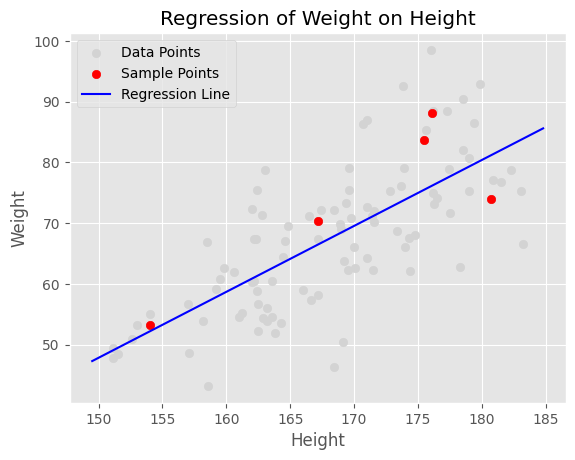

In [59]:
# choose 5 sample data points to plot
sample_points = data1.sample(n=5, random_state=42)

# plot regression line and sample points
import matplotlib.pyplot as plt

plt.scatter(data1['X1 (height)'], data1['Y1 (weight)'], color='lightgray', label='Data Points')
plt.scatter(sample_points['X1 (height)'], sample_points['Y1 (weight)'], color='red', label='Sample Points')
# regression line
x_vals = np.array(plt.gca().get_xlim())
y_vals = b0 + b1 * x_vals
plt.plot(x_vals, y_vals, color='blue', label='Regression Line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Regression of Weight on Height')
plt.legend()
plt.show()

Let's now apply the statistical tests for significance.

Let's define the hypotheses for regression significance:

$$H_0: b_1 = 0$$

$$H_1: b_1 \neq 0$$

In [60]:
SST = ((data1['Y1 (weight)'] - mean_y1) ** 2).sum()
SSR = b1 * SS_xy
SSE = SST - SSR

F = (SSR) * (n - 2) / (SSE)

# degrees of freedom
df_regression = 1
df_error = n - 2

# p-value for F-statistic
p_value_regression = 1 - stats.f.cdf(F, df_regression, df_error)

# print the p_value
print(f"F-statistic: {F:.4f}, P-value (Regression Significance): {p_value_regression:.4f}")

# significance levels
alpha_levels = [0.10, 0.05, 0.01]

results = {}
for alpha in alpha_levels:
    reject_H0 = p_value_regression < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])
results_df.index.name = 'Alpha Level'
results_df

F-statistic: 107.1791, P-value (Regression Significance): 0.0000


,Conclusion
Alpha Level,
0.10,Reject H0
0.05,Reject H0
0.01,Reject H0


Conclusion: Based on the p-values obtained from the regression significance test for the relationship between height and weight, we reject the $H_0$ at all significance levels (10%, 5%, 1%) meaning there is a significant linear relationship between height and weight.

Let's now calculate Pearson's Correlation Coefficient ($r$) and test its significance.
The formula for Pearson's Correlation Coefficient is:

$$r = \frac{SS_{xy}}{\sqrt{SS_{xx} \cdot SS_{yy}}}$$

Where:
- $SS_{yy} = \sum (y_i - \bar{y})^2$
- $r$ ranges from -1 to 1, indicating the strength and direction of the linear relationship.

In [61]:
# calculate SS_yy
data1['yy_diff'] = (data1['Y1 (weight)'] - mean_y1) ** 2
SS_yy = data1['yy_diff'].sum()

rho = SS_xy / np.sqrt(SS_xx * SS_yy)
print(f"Pearson's Correlation Coefficient (r): {rho:.4f}")

Pearson's Correlation Coefficient (r): 0.7228


From a $\rho = 0.72$ we can see the there is a strong positive relationship between height and weight.

Let's use the table for $\rho$ values:

The $df = n - 2 = 100 - 2 = 98$

The $\alpha$ values are $0.10, 0.05, 0.01$

So from the table $0.164, 0.195, 0.254$

So a value of $|0.72|$ is greater than all the critical values so we can reject $H_0$ at all significance levels.

## Part 2: Regression Model B (Variables $X_2 \to Y_2$)

**Requirement:**
Repeat the entire process from Part 1 but with **two new variables** (different columns from the dataset).

**Steps:**
1.  **Define Variables:** Select new Independent ($X_2$) and Dependent ($Y_2$) variables.
2.  **Equation:** Calculate coefficients and state the equation $\hat{y} = b_0 + b_1 x$.
3.  **Plot:** Graph the line and overlay at least 5 sample data points.
4.  **Predict:** Choose 3 new $X$ values and predict $\hat{y}$.
5.  **Test:**
    * Test Regression Significance (at 10%, 5%, 1%).
    * Test Pearson Correlation Significance (at 10%, 5%, 1%).

In [62]:
# the second pair we chose is X2 = weight, Y2 = bf
x2 = df['weight']
y2 = df['bf']

# let's create a dataframe for easier calculations
data2 = pd.DataFrame({'X2 (weight)': x2, 'Y2 (bf)': y2})
data2.head()

,X2 (weight),Y2 (bf)
0,72.18,40.0
1,67.30,18.0
2,90.50,14.7
3,77.10,25.4
4,88.48,35.6


In [63]:
# let's do the calculations by hand
n = len(data2)
mean_x2 = data2['X2 (weight)'].mean()
mean_y2 = data2['Y2 (bf)'].mean()

# calculate SS_xy and SS_xx
data2['xy_diff'] = (data2['X2 (weight)'] - mean_x2) * (data2['Y2 (bf)'] - mean_y2)
data2['xx_diff'] = (data2['X2 (weight)'] - mean_x2) ** 2

SS_xy = data2['xy_diff'].sum()
SS_xx = data2['xx_diff'].sum()

# print the intermediate calculations
print(f"n: {n}")
print(f"Mean X2 (weight): {mean_x2:.4f}")
print(f"Mean Y2 (bf): {mean_y2:.4f}")
print(f"SS_xy: {SS_xy:.4f}")
print(f"SS_xx: {SS_xx:.4f}")

n: 100
Mean X2 (weight): 67.7046
Mean Y2 (bf): 23.9431
SS_xy: -269.1473
SS_xx: 14249.1015


In [64]:
# let's calculate coefficients
b1 = SS_xy / SS_xx
b0 = mean_y2 - b1 * mean_x2
print(f"Slope (b1): {b1:.4f}")
print(f"Intercept (b0): {b0:.4f}")
# regression equation
print(f"Regression Equation: ŷ = {b0:.4f} + {b1:.4f}x")

Slope (b1): -0.0189
Intercept (b0): 25.2219
Regression Equation: ŷ = 25.2219 + -0.0189x


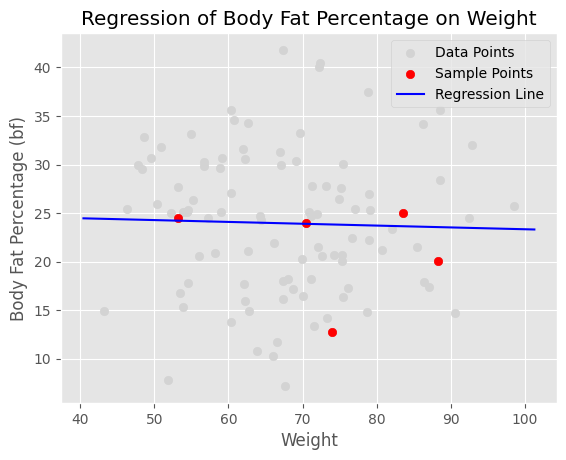

In [65]:
# plot regression line and sample points
sample_points = data2.sample(n=5, random_state=42)

plt.scatter(data2['X2 (weight)'], data2['Y2 (bf)'], color='lightgray', label='Data Points')
plt.scatter(sample_points['X2 (weight)'], sample_points['Y2 (bf)'], color='red', label='Sample Points')
# regression line
x_vals = np.array(plt.gca().get_xlim())
y_vals = b0 + b1 * x_vals
plt.plot(x_vals, y_vals, color='blue', label='Regression Line')
plt.xlabel('Weight')
plt.ylabel('Body Fat Percentage (bf)')
plt.title('Regression of Body Fat Percentage on Weight')
plt.legend()
plt.show()

In [66]:
# let's apply the statistical tests for significance.

SST = ((data2['Y2 (bf)'] - mean_y2) ** 2).sum()
SSR = b1 * SS_xy
SSE = SST - SSR

F = (SSR) * (n - 2) / (SSE)

# degrees of freedom
df_regression = 1
df_error = n - 2

# p-value for F-statistic
p_value_regression = 1 - stats.f.cdf(F, df_regression, df_error)

# print the p_value
print(f"F-statistic: {F:.4f}, P-value (Regression Significance): {p_value_regression:.4f}")

# significance levels
alpha_levels = [0.10, 0.05, 0.01]

results = {}
for alpha in alpha_levels:
    reject_H0 = p_value_regression < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])

results_df.index.name = 'Alpha Level'
results_df

F-statistic: 0.0934, P-value (Regression Significance): 0.7605


,Conclusion
Alpha Level,
0.10,Fail to Reject H0
0.05,Fail to Reject H0
0.01,Fail to Reject H0


Conclusion: Based on the p-values obtained from the regression significance test for the relationship between weight and body fat percentage, we fail to reject the $H_0$ at all significance levels (10%, 5%, 1%) meaning there is no significant linear relationship between weight and body fat percentage.

Let's calculate the Pearson's Correlation Coefficient ($\rho$) and test its significance.

In [67]:
# calculate SS_yy
data2['yy_diff'] = (data2['Y2 (bf)'] - mean_y2) ** 2
SS_yy = data2['yy_diff'].sum()

rho = SS_xy / np.sqrt(SS_xx * SS_yy)
print(f"Pearson's Correlation Coefficient (r): {rho:.4f}")

Pearson's Correlation Coefficient (r): -0.0309


For a $\rho = -0.0309$ we can see the there is a very weak negative relationship between weight and body fat percentage.

The values for the degrees of freedom is $df = n - 2 = 100 - 2 = 98$ are the same as before.

So for all significance levels (10%, 5%, 1%) we fail to reject $H_0$ meaning there is no significant correlation between weight and body fat percentage.

## Part 3: Regression Model C (Variables $X_3 \to Y_1 \text{ or } Y_2$)

**Requirement:**
Find a **new independent variable** ($X_3$) that affects **one of the dependent variables** you already used in Part 1 or Part 2.

**Steps:**
1.  **Define Variables:** Select a new Independent variable ($X_3$) and reuse a previous Dependent variable ($Y_{old}$).
2.  **Equation:** Calculate coefficients and state the equation $\hat{y} = b_0 + b_1 x$.
3.  **Plot:** Graph the line and overlay at least 5 sample data points.
4.  **Predict:** Choose 3 new $X$ values and predict $\hat{y}$.
5.  **Test:**
    * Test Regression Significance (at 10%, 5%, 1%).
    * Test Pearson Correlation Significance (at 10%, 5%, 1%).

In [68]:
# let's choose X3 = BMI, Y1 = weight
x3 = df['BMI']
y1 = df['weight']

# let's create a dataframe for easier calculations
data3 = pd.DataFrame({'X3 (BMI)': x3, 'Y1 (weight)': y1})
data3.head()

,X3 (BMI),Y1 (weight)
0,25.757634,72.18
1,25.549242,67.30
2,28.403518,90.50
3,23.560106,77.10
4,28.146710,88.48


In [69]:
# let's do the calculations by hand

n = len(data3)
mean_x3 = data3['X3 (BMI)'].mean()
mean_y1 = data3['Y1 (weight)'].mean()

# calculate SS_xy and SS_xx
data3['xy_diff'] = (data3['X3 (BMI)'] - mean_x3) * (data3['Y1 (weight)'] - mean_y1)
data3['xx_diff'] = (data3['X3 (BMI)'] - mean_x3) ** 2

SS_xy = data3['xy_diff'].sum()
SS_xx = data3['xx_diff'].sum()

# print the intermediate calculations
print(f"n: {n}")
print(f"Mean X3 (BMI): {mean_x3:.4f}")
print(f"Mean Y1 (weight): {mean_y1:.4f}")
print(f"SS_xy: {SS_xy:.4f}")
print(f"SS_xx: {SS_xx:.4f}")

n: 100
Mean X3 (BMI): 23.7661
Mean Y1 (weight): 67.7046
SS_xy: 3082.4739
SS_xx: 890.0484


In [70]:
# let's calculate coefficients
b1 = SS_xy / SS_xx
b0 = mean_y1 - b1 * mean_x3
print(f"Slope (b1): {b1:.4f}")
print(f"Intercept (b0): {b0:.4f}")
# regression equation
print(f"Regression Equation: ŷ = {b0:.4f} + {b1:.4f}x")

Slope (b1): 3.4633
Intercept (b0): -14.6036
Regression Equation: ŷ = -14.6036 + 3.4633x


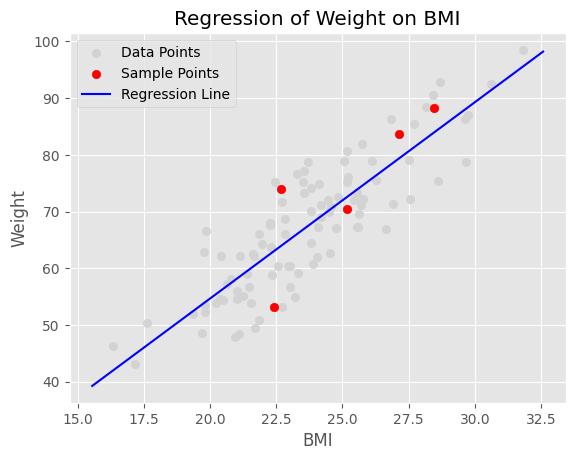

In [71]:
# let's plot regression line and sample points

sample_points = data3.sample(n=5, random_state=42)

plt.scatter(data3['X3 (BMI)'], data3['Y1 (weight)'], color='lightgray', label='Data Points')
plt.scatter(sample_points['X3 (BMI)'], sample_points['Y1 (weight)'], color='red', label='Sample Points')
# regression line
x_vals = np.array(plt.gca().get_xlim())
y_vals = b0 + b1 * x_vals
plt.plot(x_vals, y_vals, color='blue', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.title('Regression of Weight on BMI')
plt.legend()
plt.show()

In [72]:
# let's apply the statistical tests for significance.

SST = ((data3['Y1 (weight)'] - mean_y1) ** 2).sum()
SSR = b1 * SS_xy
SSE = SST - SSR

F = (SSR) * (n - 2) / (SSE)

# degrees of freedom
df_regression = 1
df_error = n - 2

# p-value for F-statistic
p_value_regression = 1 - stats.f.cdf(F, df_regression, df_error)
# print the p_value
print(f"F-statistic: {F:.4f}, P-value (Regression Significance): {p_value_regression:.4f}")
# significance levels
alpha_levels = [0.10, 0.05, 0.01]

results = {}
for alpha in alpha_levels:
    reject_H0 = p_value_regression < alpha
    results[alpha] = 'Reject H0' if reject_H0 else 'Fail to Reject H0'

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Conclusion'])
results_df.index.name = 'Alpha Level'
results_df

F-statistic: 292.7494, P-value (Regression Significance): 0.0000


,Conclusion
Alpha Level,
0.10,Reject H0
0.05,Reject H0
0.01,Reject H0


Conclusion: Based on the p-values obtained from the regression significance test for the relationship between BMI and weight, we reject the $H_0$ at all significance levels (10%, 5%, 1%) meaning there is a significant linear relationship between BMI and weight.

Let's calculate the Pearson's Correlation Coefficient ($\rho$) and test its significance.

In [73]:
# calculate SS_yy
data3['yy_diff'] = (data3['Y1 (weight)'] - mean_y1) ** 2
SS_yy = data3['yy_diff'].sum()

rho = SS_xy / np.sqrt(SS_xx * SS_yy)
print(f"Pearson's Correlation Coefficient (r): {rho:.4f}")

Pearson's Correlation Coefficient (r): 0.8656


The value for $\rho = 0.86$ indicates a very strong positive relationship between BMI and weight.

Using the table provided earlier for hypothesis testing of Pearson's Correlation Coefficient, with $df = n - 2 = 100 - 2 = 98$, we can see that for all significance levels (10%, 5%, 1%) we can reject $H_0$ meaning there is a significant correlation between BMI and weight.

# Project Task 5: Non-Parametric Tests & Paired Samples

**Objective:**
To perform advanced hypothesis testing including Paired Sample tests, Sign Tests, and Rank tests (Wilcoxon/Mann-Whitney). These tests often focus on the Median rather than the Mean and do not necessarily assume a Normal distribution.

**General Requirements:**
* **Variable:** Use one or two central variables from your database.
* **Confidence Levels:** For every test, determine the conclusion (Reject/Fail to Reject $H_0$) at **90%, 95%, and 99%**.
* **Methodology:**
    * **Small Samples:** Use exact probability tables or specific small-sample formulas.
    * **Large Samples:** Use the **Normal Approximation** with **Continuity Correction**.
* **Choice:** Questions 1-3 are mandatory. You must choose **one** additional question from 4, 5, or 6 (doing more is a bonus).

## Part 1: Paired Samples Test (Parametric)

**Scenario:**
Test the difference between two paired samples (e.g., "Before vs. After" or two different measurements on the *same* object).

**Methodology:**
1.  **Small Sample Case:**
    * Randomly select **26 observations** (pairs).
    * Calculate the differences ($d = x_1 - x_2$).
    * Perform a T-test on the mean of differences ($\mu_d$).
2.  **Large Sample Case:**
    * Randomly select **72 observations**.
    * Use the **Normal Approximation** (Z-test) and apply **Continuity Correction**.
3.  **Hypothesis ($H_1$):** Formulate a logical alternative hypothesis based on your data.
4.  **Output:** Determine rejection at 90%, 95%, and 99%.

In [74]:
np.random.seed(42)  # For reproducibility
noise = np.random.normal(loc=-0.5, scale=2.0, size=len(df))  # Mean change of -0.5kg
df["weight_after"] = df["weight"] + noise

In [75]:
# 1. Sample 26 observations
n1 = 26
sample1 = df.sample(n=n1, random_state=42)

# 2. Calculate Differences (d)
# d = X1 - X2
d = sample1["weight"] - sample1["weight_after"]

# 3. Calculate Descriptive Statistics "By Hand"
d_bar = d.mean()  # Mean of differences
s_d = d.std(ddof=1)  # Sample Standard Deviation of differences
se = s_d / np.sqrt(n1)  # Standard Error

# 4. Calculate Test Statistic (t)
# H0: mu_d = 0 (No difference)
mu_0 = 0
t_stat = (d_bar - mu_0) / se

# 5. Calculate P-Value (Two-tailed)
# We use the T-distribution with n-1 degrees of freedom
df_t = n1 - 1
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df_t))

# 6. Output Results
print(f"Mean Difference (d_bar): {d_bar:.4f}")
print(f"Std Dev of Diff (s_d):   {s_d:.4f}")
print(f"Standard Error (SE):     {se:.4f}")
print(f"T-Statistic:             {t_stat:.4f}")
print(f"P-Value:                 {p_value:.4f}")

# 7. Conclusions at Significance Levels
alpha_levels = [0.10, 0.05, 0.01]
results1 = {}

for alpha in alpha_levels:
    reject_H0 = p_value < alpha
    results1[alpha] = "Reject H0" if reject_H0 else "Fail to Reject H0"

results_df1 = pd.DataFrame.from_dict(results1, orient="index", columns=["Conclusion"])
results_df1.index.name = "Alpha Level"
print("\nConclusions (Small Sample):")
print(results_df1)

Mean Difference (d_bar): 0.7304
Std Dev of Diff (s_d):   1.5650
Standard Error (SE):     0.3069
T-Statistic:             2.3798
P-Value:                 0.0253

Conclusions (Small Sample):
                    Conclusion
Alpha Level                   
0.10                 Reject H0
0.05                 Reject H0
0.01         Fail to Reject H0


In [76]:
# 1. Sample 72 observations
n2 = 72
sample2 = df.sample(n=n2, random_state=42)

# 2. Calculate Differences (d)
d_large = sample2["weight"] - sample2["weight_after"]

# 3. Calculate Descriptive Statistics "By Hand"
d_bar_large = d_large.mean()
s_d_large = d_large.std(ddof=1)
se_large = s_d_large / np.sqrt(n2)

# 4. Calculate Test Statistic (Z)
# For large n, T approaches Z (Normal Distribution)
z_stat = (d_bar_large - mu_0) / se_large

# 5. Calculate P-Value (Two-tailed)
# We use the Standard Normal Distribution (Z)
p_value_large = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# 6. Output Results
print(f"Mean Difference (d_bar): {d_bar_large:.4f}")
print(f"Z-Statistic:             {z_stat:.4f}")
print(f"P-Value:                 {p_value_large:.4f}")

# 7. Conclusions at Significance Levels
results2 = {}
for alpha in alpha_levels:
    reject_H0 = p_value_large < alpha
    results2[alpha] = "Reject H0" if reject_H0 else "Fail to Reject H0"

results_df2 = pd.DataFrame.from_dict(results2, orient="index", columns=["Conclusion"])
results_df2.index.name = "Alpha Level"
print("\nConclusions (Large Sample):")
print(results_df2)

Mean Difference (d_bar): 0.6905
Z-Statistic:             3.4331
P-Value:                 0.0006

Conclusions (Large Sample):
            Conclusion
Alpha Level           
0.10         Reject H0
0.05         Reject H0
0.01         Reject H0


## Part 2: Sign Test (One Sample - Median)

**Scenario:**
A non-parametric test to check if the population **Median** differs from a specific value ($H_0: Median = M_0$).

**Methodology:**
1.  **Small Sample Case:**
    * Randomly select **18 observations**.
    * Count the number of "Positive" (+) and "Negative" (-) signs relative to the hypothesized median.
    * Use the Binomial distribution (exact calculation).
2.  **Large Sample Case:**
    * Randomly select **42 observations**.
    * Use the **Normal Approximation** for the Binomial distribution with **Continuity Correction**.
3.  **Hypothesis:** Formulate an alternative hypothesis.
4.  **Output:** Determine rejection at 90%, 95%, and 99%.

In [77]:
# Let's use 'height' as the variable for this test
variable_name = "height"

# Calculate the Global Median to use as our "Hypothesized Median" (M0)
# In a real scenario, this might be a known standard (e.g., 170cm)
M0 = df[variable_name].median()

print(f"Variable: {variable_name}")
print(f"Hypothesized Median (M0): {M0}")
print("H0: Median = M0")
print("H1: Median != M0 (Two-tailed)")

Variable: height
Hypothesized Median (M0): 169.05
H0: Median = M0
H1: Median != M0 (Two-tailed)


In [78]:
# 1. Sample 18 observations
n_small = 18
sample_small = df.sample(n=n_small, random_state=42)[variable_name]

# 2. Calculate Signs
# Calculate differences from the hypothesized median
diffs = sample_small - M0

# Count Positive (+) and Negative (-) signs
# Note: We ignore zeros (values exactly equal to M0)
n_pos = (diffs > 0).sum()
n_neg = (diffs < 0).sum()

# The effective sample size (excluding ties)
n_effective = n_pos + n_neg

# 3. Test Statistic (S)
# S is the smaller of the two counts (min(n_pos, n_neg))
S = min(n_pos, n_neg)

# 4. Calculate P-Value (Exact Binomial)
# probability of getting k <= S successes in n_effective trials with p=0.5
# We multiply by 2 for a two-tailed test
p_value_small = 2 * stats.binom.cdf(S, n_effective, 0.5)

# 5. Output Results
print(f"--- Small Sample (n={n_small}) Results ---")
print(f"Positive Signs (+): {n_pos}")
print(f"Negative Signs (-): {n_neg}")
print(f"Effective n:        {n_effective}")
print(f"Test Statistic (S): {S}")
print(f"P-Value:            {p_value_small:.4f}")

# 6. Conclusion
alpha_levels = [0.10, 0.05, 0.01]
print("\nConclusions:")
for alpha in alpha_levels:
    decision = "Reject H0" if p_value_small < alpha else "Fail to Reject H0"
    print(f"Alpha {alpha}: {decision}")

--- Small Sample (n=18) Results ---
Positive Signs (+): 9
Negative Signs (-): 9
Effective n:        18
Test Statistic (S): 9
P-Value:            1.1855

Conclusions:
Alpha 0.1: Fail to Reject H0
Alpha 0.05: Fail to Reject H0
Alpha 0.01: Fail to Reject H0


In [81]:
import math

# 1. Sample 42 observations
n_large = 42
sample_large = df.sample(n=n_large, random_state=42)[variable_name]

# 2. Calculate Signs
diffs_large = sample_large - M0
n_pos_l = (diffs_large > 0).sum()
n_neg_l = (diffs_large < 0).sum()
n_eff_l = n_pos_l + n_neg_l  # Effective sample size

# 3. Test Statistic (Z) with Continuity Correction
# Expected Mean (mu) for Binomial is n * p = n * 0.5
mu = n_eff_l * 0.5

# Standard Deviation (sigma) for Binomial is sqrt(n * p * q) = sqrt(n * 0.25) = 0.5 * sqrt(n)
sigma = 0.5 * math.sqrt(n_eff_l)

# The Statistic K is the number of successes (we usually take the larger one for the formula,
# or use absolute deviation from mean).
# Z = (|K - mu| - 0.5) / sigma
# We use the count that is furthest from the mean, or simply the larger count.
# Let's use the standard approximation formula:
K = max(n_pos_l, n_neg_l)
Z = (abs(K - mu) - 0.5) / sigma

# 4. Calculate P-Value (Two-tailed from Z-score)
p_value_large = 2 * (1 - stats.norm.cdf(Z))

# 5. Output Results
print(f"--- Large Sample (n={n_large}) Results ---")
print(f"Positive Signs (+): {n_pos_l}")
print(f"Negative Signs (-): {n_neg_l}")
print(f"Effective n:        {n_eff_l}")
print(f"Expected Mean (mu): {mu:.2f}")
print(f"Std Dev (sigma):    {sigma:.4f}")
print(f"Z-Statistic:        {Z:.4f}")
print(f"P-Value:            {p_value_large:.4f}")

# 6. Conclusion
print("\nConclusions:")
for alpha in alpha_levels:
    decision = "Reject H0" if p_value_large < alpha else "Fail to Reject H0"
    print(f"Alpha {alpha}: {decision}")

--- Large Sample (n=42) Results ---
Positive Signs (+): 17
Negative Signs (-): 25
Effective n:        42
Expected Mean (mu): 21.00
Std Dev (sigma):    3.2404
Z-Statistic:        1.0801
P-Value:            0.2801

Conclusions:
Alpha 0.1: Fail to Reject H0
Alpha 0.05: Fail to Reject H0
Alpha 0.01: Fail to Reject H0


## Part 3: Sign Test (Two Paired Samples)

**Scenario:**
A non-parametric test to compare two paired groups to see if one tends to be larger than the other (testing the Median of differences).

**Methodology:**
1.  **Small Sample Case:**
    * Randomly select **21 observations** (pairs).
    * Determine the sign of the difference for each pair ($+$ if $A>B$, $-$ if $A<B$).
2.  **Large Sample Case:**
    * Randomly select **36 observations**.
    * Use the **Normal Approximation** with **Continuity Correction**.
3.  **Hypothesis:** Formulate an alternative hypothesis.
4.  **Output:** Determine rejection at 90%, 95%, and 99%.

In [82]:
# 1. Sample 21 observations
n_small_paired = 21
sample_small = df.sample(n=n_small_paired, random_state=42)

# 2. Calculate Differences (D = X1 - X2)
diffs_small = sample_small["weight"] - sample_small["weight_after"]

# 3. Count Signs (Positive vs Negative)
# We ignore cases where difference is exactly 0
n_pos = (diffs_small > 0).sum()
n_neg = (diffs_small < 0).sum()
n_eff = n_pos + n_neg  # Effective sample size (excluding ties)

# 4. Test Statistic (S)
# S is the count of the "less frequent" sign
S = min(n_pos, n_neg)

# 5. Calculate P-Value (Exact Binomial)
# We want the probability of getting S or fewer successes out of n_eff trials
# Multiplied by 2 for a two-tailed test.
p_value_small = 2 * stats.binom.cdf(S, n_eff, 0.5)

# 6. Output Results
print(f"--- Small Sample (n={n_small_paired}) Results ---")
print(f"Positive Differences (+): {n_pos}")
print(f"Negative Differences (-): {n_neg}")
print(f"Effective n:              {n_eff}")
print(f"Test Statistic (S):       {S}")
print(f"P-Value:                  {p_value_small:.4f}")

# 7. Conclusions
alpha_levels = [0.10, 0.05, 0.01]
print("\nConclusions:")
for alpha in alpha_levels:
    decision = "Reject H0" if p_value_small < alpha else "Fail to Reject H0"
    print(f"Alpha {alpha}: {decision}")

--- Small Sample (n=21) Results ---
Positive Differences (+): 15
Negative Differences (-): 6
Effective n:              21
Test Statistic (S):       6
P-Value:                  0.0784

Conclusions:
Alpha 0.1: Reject H0
Alpha 0.05: Fail to Reject H0
Alpha 0.01: Fail to Reject H0


In [83]:
# 1. Sample 36 observations
n_large_paired = 36
sample_large = df.sample(n=n_large_paired, random_state=42)

# 2. Calculate Differences and Signs
diffs_large = sample_large["weight"] - sample_large["weight_after"]
n_pos_l = (diffs_large > 0).sum()
n_neg_l = (diffs_large < 0).sum()
n_eff_l = n_pos_l + n_neg_l

# 3. Normal Approximation Parameters
# Mean (mu) and SD (sigma) for a binomial distribution under H0 (p=0.5)
mu = 0.5 * n_eff_l
sigma = 0.5 * math.sqrt(n_eff_l)

# 4. Calculate Z-Statistic with Continuity Correction
# We take the number of successes (let's say n_pos_l) and find its distance from the mean.
# We subtract 0.5 from the absolute difference to correct for continuity.
numerator = abs(n_pos_l - mu) - 0.5
Z_stat = numerator / sigma

# 5. Calculate P-Value (Two-tailed from Z)
p_value_large = 2 * (1 - stats.norm.cdf(abs(Z_stat)))

# 6. Output Results
print(f"--- Large Sample (n={n_large_paired}) Results ---")
print(f"Positive Differences (+): {n_pos_l}")
print(f"Negative Differences (-): {n_neg_l}")
print(f"Effective n:              {n_eff_l}")
print(f"Expected Mean (mu):       {mu:.2f}")
print(f"Std Dev (sigma):          {sigma:.4f}")
print(f"Z-Statistic:              {Z_stat:.4f}")
print(f"P-Value:                  {p_value_large:.4f}")

# 7. Conclusions
print("\nConclusions:")
for alpha in alpha_levels:
    decision = "Reject H0" if p_value_large < alpha else "Fail to Reject H0"
    print(f"Alpha {alpha}: {decision}")

--- Large Sample (n=36) Results ---
Positive Differences (+): 26
Negative Differences (-): 10
Effective n:              36
Expected Mean (mu):       18.00
Std Dev (sigma):          3.0000
Z-Statistic:              2.5000
P-Value:                  0.0124

Conclusions:
Alpha 0.1: Reject H0
Alpha 0.05: Reject H0
Alpha 0.01: Fail to Reject H0


## Option A (Q4): Wilcoxon Signed-Rank Test (One Sample)
* **Goal:** Test the Median of a single population (more powerful than the Sign Test).
* **Small Sample:** 17 observations.
* **Large Sample:** 49 observations (use Normal Approx + Continuity Correction).

## Option B (Q5): Wilcoxon Signed-Rank Test (Two Paired Samples)
* **Goal:** Compare two paired groups taking into account the *magnitude* of differences, not just the sign.
* **Small Sample:** 10 observations.
* **Large Sample:** 52 observations (use Normal Approx + Continuity Correction).

## Option C (Q6): Mann-Whitney U Test (Two Independent Samples)
* **Goal:** Compare distributions of two *independent* groups (Non-parametric equivalent to the independent T-test).
* **Small Sample:** 8 observations.
* **Large Sample:** 72 observations (use Normal Approx + Continuity Correction).

In [84]:
# 1. Sample 8 observations total
# We need to ensure we get at least a few from each group
n_small_mw = 8
sample_small = df.sample(n=n_small_mw, random_state=42)

# Split into two groups
group1 = sample_small[sample_small["gender"] == 0]["weight"]
group2 = sample_small[sample_small["gender"] == 1]["weight"]

print(f"Group 0 count: {len(group1)}")
print(f"Group 1 count: {len(group2)}")

# 2. Perform Mann-Whitney U Test
# use_continuity=False usually for exact small samples, but standard is True
# 'two-sided' hypothesis
stat_small, p_value_small = stats.mannwhitneyu(group1, group2, alternative="two-sided")

# 3. Output Results
print(f"--- Small Sample (n={n_small_mw}) Results ---")
print(f"U-Statistic: {stat_small}")
print(f"P-Value:     {p_value_small:.4f}")

# 4. Conclusions
alpha_levels = [0.10, 0.05, 0.01]
print("\nConclusions:")
for alpha in alpha_levels:
    decision = "Reject H0" if p_value_small < alpha else "Fail to Reject H0"
    print(f"Alpha {alpha}: {decision}")

Group 0 count: 3
Group 1 count: 5
--- Small Sample (n=8) Results ---
U-Statistic: 0.0
P-Value:     0.0357

Conclusions:
Alpha 0.1: Reject H0
Alpha 0.05: Reject H0
Alpha 0.01: Fail to Reject H0


In [85]:
# 1. Sample 72 observations
n_large_mw = 72
sample_large = df.sample(n=n_large_mw, random_state=42)

# Split into two groups
g1 = sample_large[sample_large["gender"] == 0]["weight"]
g2 = sample_large[sample_large["gender"] == 1]["weight"]

n1 = len(g1)
n2 = len(g2)

# 2. Calculate U Statistic "By Hand"
# U1 = R1 - (n1*(n1+1))/2
# Where R1 is the sum of ranks for group 1
# We use 'rankdata' to get ranks for the combined data
combined_data = np.concatenate([g1, g2])
ranks = stats.rankdata(combined_data)

# Sum of ranks for Group 1 (which corresponds to the first n1 elements)
R1 = np.sum(ranks[:n1])
U1 = R1 - (n1 * (n1 + 1)) / 2

# The U statistic used is usually the smaller of U1 and U2
# U2 can be calculated as: n1*n2 - U1
U2 = n1 * n2 - U1
U = min(U1, U2)

# 3. Calculate Normal Approximation (Z)
# Mean (mu_U) = (n1 * n2) / 2
mu_U = (n1 * n2) / 2

# Std Dev (sigma_U) = sqrt( (n1 * n2 * (n1 + n2 + 1)) / 12 )
sigma_U = math.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12)

# Z with Continuity Correction: (|U - mu_U| - 0.5) / sigma_U
Z_mw = (abs(U - mu_U) - 0.5) / sigma_U

# 4. Calculate P-Value (Two-tailed)
p_value_large = 2 * (1 - stats.norm.cdf(abs(Z_mw)))

# 5. Output Results
print(f"--- Large Sample (n={n_large_mw}) Results ---")
print(f"n1: {n1}, n2: {n2}")
print(f"Rank Sum R1:    {R1}")
print(f"U-Statistic:    {U}")
print(f"Expected Mean:  {mu_U:.2f}")
print(f"Std Dev (sigma):{sigma_U:.4f}")
print(f"Z-Statistic:    {Z_mw:.4f}")
print(f"P-Value:        {p_value_large:.4f}")

# 6. Conclusions
print("\nConclusions:")
for alpha in alpha_levels:
    decision = "Reject H0" if p_value_large < alpha else "Fail to Reject H0"
    print(f"Alpha {alpha}: {decision}")

--- Large Sample (n=72) Results ---
n1: 31, n2: 41
Rank Sum R1:    585.5
U-Statistic:    89.5
Expected Mean:  635.50
Std Dev (sigma):87.9313
Z-Statistic:    6.2037
P-Value:        0.0000

Conclusions:
Alpha 0.1: Reject H0
Alpha 0.05: Reject H0
Alpha 0.01: Reject H0
